In [3]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

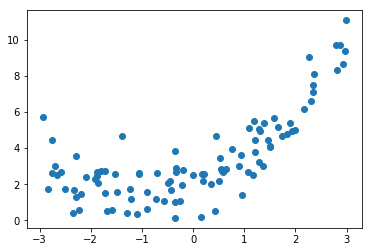

In [8]:
plt.scatter(x=x, y=y) #生成样本数据.

In [15]:
X2 = np.hstack([X, X**2])

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X2, y)
y_predict = lin_reg.predict(X2)

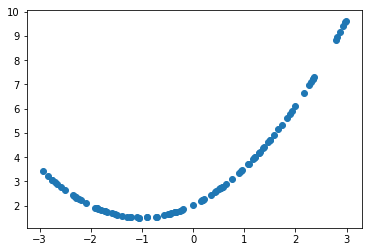

In [17]:
plt.scatter(x=x, y=y_predict) # 曲线.

In [20]:
# 增加新特征， 如x2

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [21]:
X2[:5, :] # x0, x, x2

array([[ 1.        ,  2.16979836,  4.70802492],
       [ 1.        , -1.39374948,  1.94253762],
       [ 1.        ,  1.3022119 ,  1.69575584],
       [ 1.        , -0.48081489,  0.23118296],
       [ 1.        , -1.73071715,  2.99538186]])

In [22]:
# Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [24]:
poly_regression.fit(X, y)
y_predict = poly_regression.predict(X)

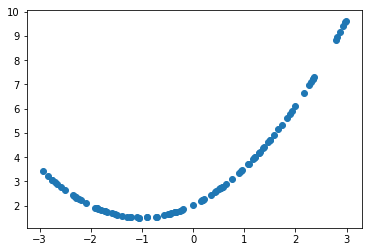

In [25]:
plt.scatter(x=x, y=y_predict) # 曲线.

In [28]:
# 欠拟合和过拟合
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y_predict100 = poly100_reg.predict(X)

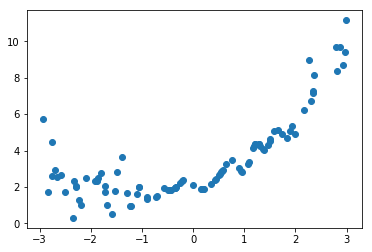

In [29]:
plt.scatter(x=x, y=y_predict100) # 曲线.

In [32]:
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot = poly100_reg.predict(X_plot)

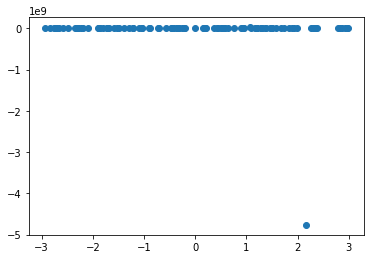

In [39]:
plt.scatter(x=x, y=y_plot) # 曲线.

In [40]:
# 学习曲线
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
from sklearn.metrics import mean_squared_error #均方误差
def learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, 76):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))

In [46]:
def plot_learning_curve(estimator, titli, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [ ]:
estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

In [51]:
# 验证数据集和交叉验证. k-folds 交叉验证. 用于交叉验证的 cross_val_score，模型将数据分成三份用于交叉验证，返回三个模型的估算分数.
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)
# array([0.97790055, 0.98888889, 0.9747191 ])

In [ ]:
best_score, best_p, best_k = 0, 0, 0
for k in range(2, 10):
    for p in range(1, 5):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
            
print("best score is: ", best_score)
print("best p is: ", best_p)
print("best k is: ", best_k)

# best score is:  0.987946926378859
# best p is:  3
# best k is:  2

In [ ]:
# 训练模型
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=3)
best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)
#0.9847009735744089

In [60]:
#网格搜索.
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    }
]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid=param_grid, verbose=1)
grid_search.fit(X_train, y_train)

grid_search.best_params_
best_knn_clf = grid_search.best_estimator_

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.3min finished


In [ ]:
# 方差处理. 模型误差=偏差（Bias）+方差（Variance）+不可避免的误差.  对于欠拟合，就属于高偏差；而过拟合，就属于高方差. 

#岭回归

from sklearn.linear_model import Ridge

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

def PolynomialRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()), 
        ("ridge_reg", Ridge(alpha=alpha))
    ])


ridge_reg = PolynomialRegression(20, 0.0001)
ridge_reg.fit(X_train, y_train)

y_predict = ridge_reg.predict(X_test)
plt.scatter(x=x, y=y_predict)
plt.plot(x, y_predict, color='red', label='Ridge')
plt.show()

In [ ]:
# LASSO 回归

from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])

lasso_reg = PolynomialRegression(20, 0.01)
lasso_reg.fit(X_train, y_train)

y_predict = lasso_reg.predict(X_test)
plt.scatter(x=x, y=y_predict)
plt.plot(x, y_predict, color='blue', label='LASSO')
plt.show()

In [ ]:
lasso_reg = PolynomialRegression(20, 0.1)
lasso_reg.fit(X_train, y_train)

y_predict = lasso_reg.predict(X_test)
plt.scatter(x=x, y=y_predict)
plt.plot(x, y_predict, color='blue', label='LASSO New')
plt.show()